In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [25]:
df = pd.read_csv('ushape.csv')

In [26]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1
1,0.882490,-0.075756,0
2,-0.055144,-0.037332,1
3,0.829545,-0.539321,1
4,2.112857,0.662084,1


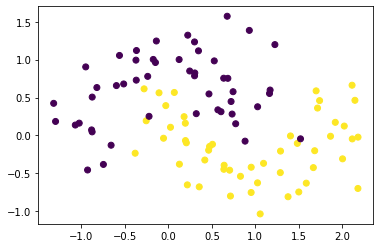

In [27]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [28]:
X= df.iloc[:, 0:2].values
y = df.iloc[:,-1].values

In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2024-10-09 17:59:25.070250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 17:59:25.086713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 17:59:25.091524: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 17:59:25.103338: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 17:59:26.723901: W tensorflow/compiler/tf2

In [31]:
model = Sequential()

model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# set parameters to 0
model.get_weights()

[array([[ 0.09784162, -0.42300338],
        [-0.8677436 , -0.5858569 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.23513055],
        [-1.0282493 ]], dtype=float32),
 array([0.], dtype=float32)]

In [33]:
initial_weights = model.get_weights()

In [35]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [36]:
model.set_weights(initial_weights)

In [37]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history = model.fit(X,y,epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5032 - loss: 0.8602 - val_accuracy: 0.5000 - val_loss: 0.8362
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5110 - loss: 0.8508 - val_accuracy: 0.5000 - val_loss: 0.8340
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5266 - loss: 0.8325 - val_accuracy: 0.5000 - val_loss: 0.8319
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5032 - loss: 0.8527 - val_accuracy: 0.5000 - val_loss: 0.8297
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4954 - loss: 0.8577 - val_accuracy: 0.5000 - val_loss: 0.8277
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4836 - loss: 0.8734 - val_accuracy: 0.5000 - val_loss: 0.8257
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5188 - loss: 0.8262 - val_accuracy: 0.5000 - val_loss: 0.8237
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5149 - loss: 0.8361 - val_accuracy: 0.5000 - val_loss:

In [40]:
model.get_weights()

[array([[0.701743  , 0.701743  ],
        [0.24269481, 0.24269481]], dtype=float32),
 array([0.27628112, 0.27628112], dtype=float32),
 array([[0.26906124],
        [0.26906124]], dtype=float32),
 array([0.25484645], dtype=float32)]

3888/3888 ━━━━━━━━━━━━━━━━━━━━ 4s 918us/step


<Axes: >

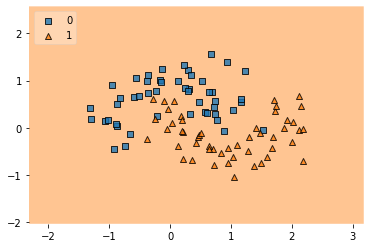

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)